In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [3]:
exc_data_path = "/u/dem/kebl6911/Part-II/MASH_optimization/Data/mash_exc300K.dat"
site_data_path = "/u/dem/kebl6911/Part-II/MASH_optimization/Data/mash_site300K.dat"

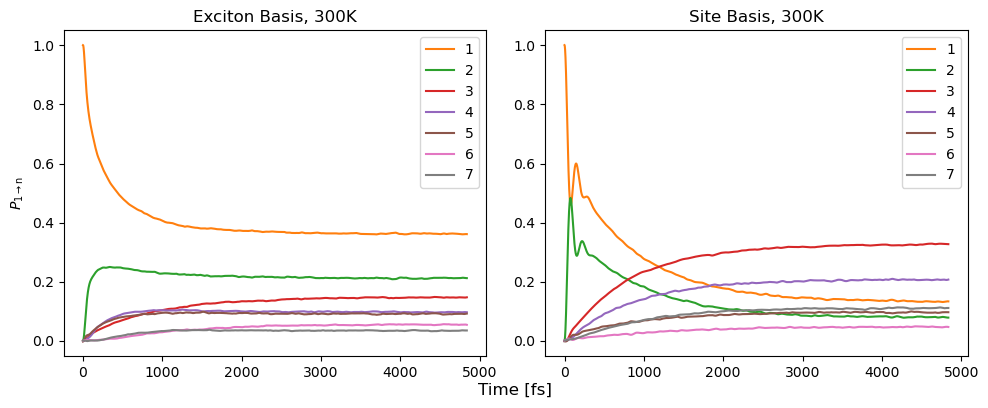

In [4]:
exc_data = np.loadtxt(exc_data_path)
site_data = np.loadtxt(site_data_path)

column_names = ["Time"]

# DATA IMPORT - Usin Pandas because it is easier to me
for i in range(1,8):
    column_names.append(str(i))

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

for i, column_name in enumerate(column_names[1:], start=1):
    c = "C%i"%i
    axs[0].plot(exc_data[:,0], exc_data[:,i],"-", label=column_name, color=c)
    axs[1].plot(site_data[:,0], site_data[:,i],"-", label=column_name,color=c)


axs[0].set_title("Exciton Basis, 300K")
axs[0].set_ylabel(r"$P_{\mathrm{1\rightarrow n}}$")
axs[1].set_title("Site Basis, 300K")
axs[0].legend()
axs[1].legend()

fig.text(0.52, 0, 'Time [fs]', ha='center', fontsize=12)
plt.tight_layout()
plt.show()

# Description of Plot

## Generation of Data Used

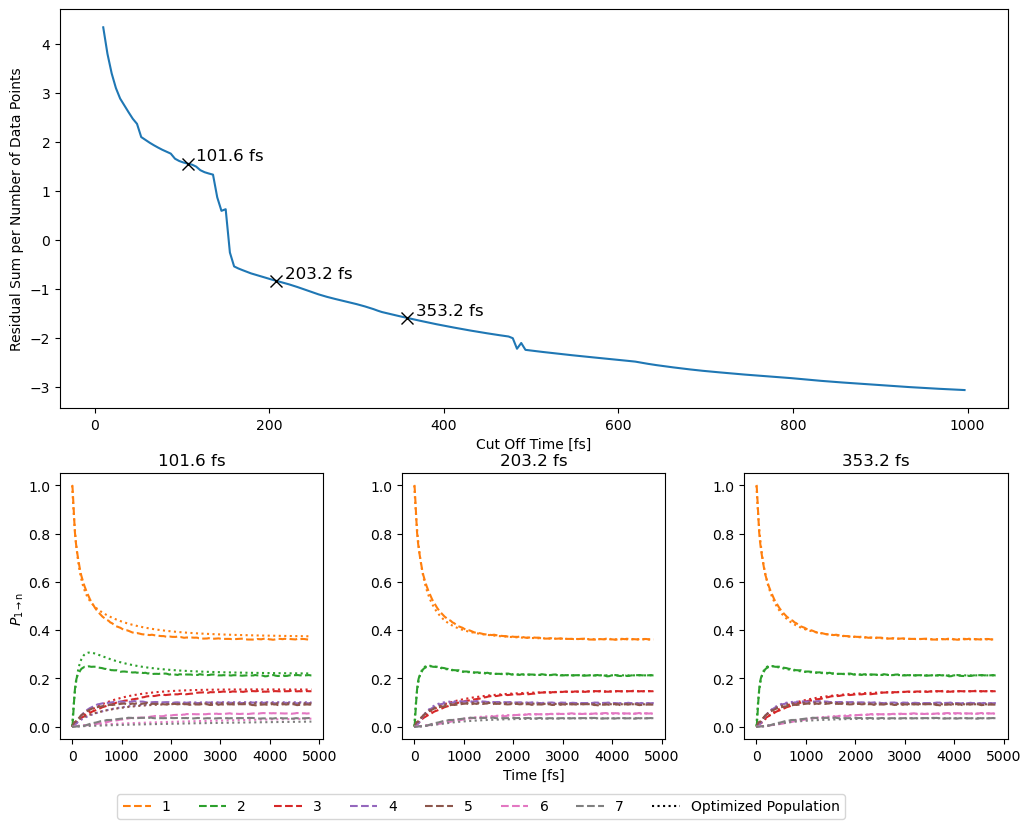

In [5]:
residual_data = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/Exc_residuals/Divided_residuals/residualdivided_data.dat")
exc_data = np.loadtxt(exc_data_path)

from matplotlib import lines, pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import matplotlib.gridspec as gridspec

column_names = ["Time"]
site_data_path = "Data/mash_exc300K.dat"

# DATA IMPORT - Using Pandas because it is easier to me
for i in range(1,8):
    column_names.append(str(i))
# Create a 2x1 grid of subplots
fig = plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 2])

# Top plot: Square plot
ax0 = plt.subplot(gs[0])
ax0.plot(residual_data[:,0],np.log(residual_data[:,1]))
# ax0.set_title('Square Plot')
ax0.set_ylabel('Residual Sum per Number of Data Points')
ax0.set_xlabel('Cut Off Time [fs]')

ax0.plot(residual_data[20,0], np.log(residual_data[20,1]), 'x', markersize=8, color = 'black')
ax0.text(residual_data[20,0]+10, np.log(residual_data[20,1]), '101.6 fs', fontsize=12, ha='left', va='bottom', color='black')

ax0.plot(residual_data[41,0], np.log(residual_data[41,1]), 'x', markersize=8, color = 'black')
ax0.text(residual_data[41,0]+10, np.log(residual_data[41,1]), '203.2 fs', fontsize=12, ha='left', va='bottom', color='black')

ax0.plot(residual_data[72,0], np.log(residual_data[72,1]), 'x', markersize=8, color = 'black')
ax0.text(residual_data[72,0]+10, np.log(residual_data[72,1]), '353.2 fs', fontsize=12, ha='left', va='bottom', color='black')

# Bottom row: Three horizontal subplots
gs_sub = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=gs[1], wspace=0.3)

ax1 = plt.Subplot(fig, gs_sub[0])
ax2 = plt.Subplot(fig, gs_sub[1])
ax3 = plt.Subplot(fig, gs_sub[2])

fig.add_subplot(ax1)
fig.add_subplot(ax2)
fig.add_subplot(ax3)

data_101 = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/Exc_residuals/101.59317448676096_20.dat")
for i, column_name in enumerate(column_names[1:], start=1):
    c = "C%i"%i
    ax1.plot(exc_data[:,0], exc_data[:,i],"--", label=column_name, color=c)
    ax1.plot(data_101[:,0],data_101[:,i], ":",color=c)
ax1.set_title('101.6 fs')

data_203 = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/Exc_residuals/203.18634897352192_41.dat")
for i, column_name in enumerate(column_names[1:], start=1):
    c = "C%i"%i
    ax2.plot(exc_data[:,0], exc_data[:,i],"--", label=column_name, color=c)
    ax2.plot(data_203[:,0],data_203[:,i], ":",color=c)

ax2.set_xlabel("Time [fs]")
ax2.set_title('203.2 fs')

data_353 = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/Exc_residuals/353.1572255968357_72.dat")
for i, column_name in enumerate(column_names[1:], start=1):
    c = "C%i"%i
    ax3.plot(exc_data[:,0], exc_data[:,i],"--", label=column_name, color=c)
    ax3.plot(data_353[:,0],data_353[:,i], ":",color=c)

ax3.set_title('353.2 fs')
ax3.legend(bbox_to_anchor=(1.2, 1), borderaxespad=0)

fig.text(0.001, 0.25, r'$P_{\mathrm{1\rightarrow n}}$', va='center', rotation='vertical')
custom_legend_entry = Line2D([0], [0], linestyle=':', label='Dotted Lines', color='black')

ax3.set_title('353.2 fs')

# Define custom legend entries for dotted lines
dotted_legend_entry = Line2D([0], [0], linestyle=':', label='Optimized Population', color="black")

# Add the custom legend entries to the legend
legend_handles, legend_labels = ax3.get_legend_handles_labels()
legend_handles.append(dotted_legend_entry)
legend_labels.append('Optimized Population')
ax3.legend(legend_handles, legend_labels, loc='lower center', bbox_to_anchor=(-1, -0.3), borderaxespad=0, ncol=82)  # Adjust the values as needed

# Adjust spacing between subplots

plt.tight_layout(pad = 0.1)
plt.show()

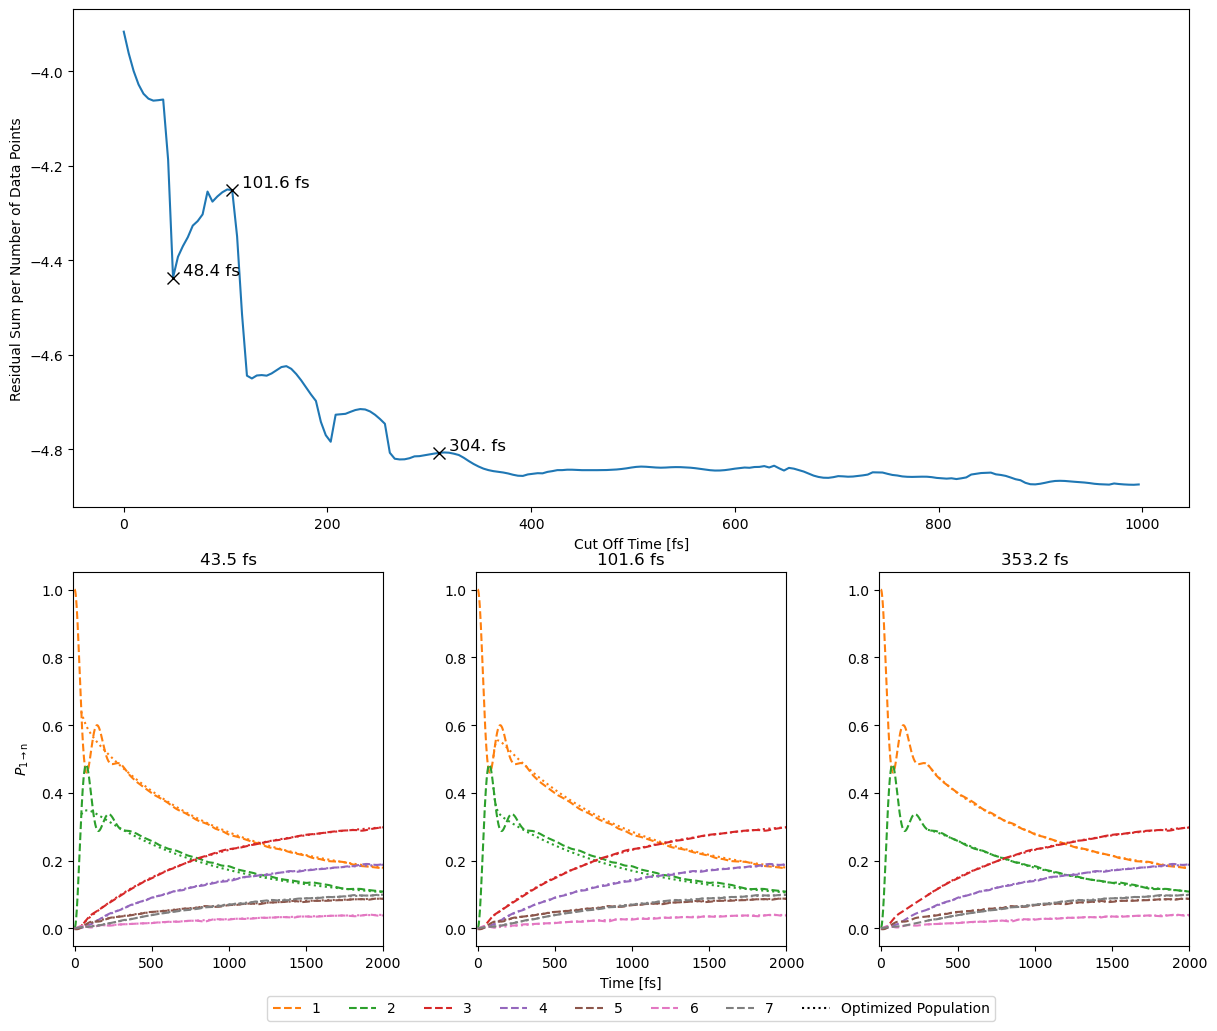

In [6]:
site_residual_data = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/Site_data_cut/residual_data.dat")
site_residual_data = site_residual_data[site_residual_data[:,0] <= 1000]

from matplotlib import lines, pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import matplotlib.gridspec as gridspec

column_names = ["Time"]
for i in range(1,8):
    column_names.append(str(i))
# Create a 2x1 grid of subplots
fig = plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
gs = gridspec.GridSpec(2, 1, height_ratios=[4, 3])

# Top plot: Square plot
ax0 = plt.subplot(gs[0])
ax0.plot(site_residual_data[:,0],np.log(site_residual_data[:,1]))
# ax0.set_title('Square Plot')
ax0.set_ylabel('Residual Sum per Number of Data Points')
ax0.set_xlabel('Cut Off Time [fs]')

ax0.plot(site_residual_data[10,0], np.log(site_residual_data[10,1]), 'x', markersize=8, color = 'black')
ax0.text(site_residual_data[10,0]+10, np.log(site_residual_data[10,1]), '48.4 fs', fontsize=12, ha='left', va='bottom', color='black')

ax0.plot(site_residual_data[22,0], np.log(site_residual_data[22,1]), 'x', markersize=8, color = 'black')
ax0.text(site_residual_data[22,0]+10, np.log(site_residual_data[22,1]), '101.6 fs', fontsize=12, ha='left', va='bottom', color='black')

ax0.plot(site_residual_data[64,0], np.log(site_residual_data[64,1]), 'x', markersize=8, color = 'black')
ax0.text(site_residual_data[64,0]+10, np.log(site_residual_data[64,1]), '304. fs', fontsize=12, ha='left', va='bottom', color='black')

# Bottom row: Three horizontal subplots
gs_sub = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=gs[1], wspace=0.3)

ax1 = plt.Subplot(fig, gs_sub[0])
ax2 = plt.Subplot(fig, gs_sub[1])
ax3 = plt.Subplot(fig, gs_sub[2])

fig.add_subplot(ax1)
fig.add_subplot(ax2)
fig.add_subplot(ax3)

data_43 = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/Site_data_cut/43.53993192289755_10.dat")
for i, column_name in enumerate(column_names[1:], start=1):
    c = "C%i"%i
    ax1.plot(site_data[:,0], site_data[:,i],"--", label=column_name, color=c)
    ax1.plot(data_43[:,0],data_43[:,i], ":",color=c)

ax1.set_xlim(-10,2000)
ax1.set_title('43.5 fs')

data_102 = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/Site_data_cut/101.59317448676096_22.dat")
for i, column_name in enumerate(column_names[1:], start=1):
    c = "C%i"%i
    ax2.plot(site_data[:,0], site_data[:,i],"--", label=column_name, color=c)
    ax2.plot(data_102[:,0],data_102[:,i], ":",color=c)

ax2.set_xlim(-10,2000)
ax2.set_xlabel("Time [fs]")
ax2.set_title('101.6 fs')

data_305 = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/Site_data_cut/304.77952346028286_64.dat")
for i, column_name in enumerate(column_names[1:], start=1):
    c = "C%i"%i
    ax3.plot(site_data[:,0], site_data[:,i],"--", label=column_name, color=c)
    ax3.plot(data_305[:,0],data_305[:,i], ":",color=c)

ax3.set_xlim(-10,2000)
ax3.set_title('304.8 fs')
ax3.legend(bbox_to_anchor=(1.2, 1), borderaxespad=0)

fig.text(0.005, 0.25, r'$P_{\mathrm{1\rightarrow n}}$', va='center', rotation='vertical')
custom_legend_entry = Line2D([0], [0], linestyle=':', label='Dotted Lines', color='black')

ax3.set_title('353.2 fs')

# Define custom legend entries for dotted lines
dotted_legend_entry = Line2D([0], [0], linestyle=':', label='Optimized Population', color="black")

# Add the custom legend entries to the legend
legend_handles, legend_labels = ax3.get_legend_handles_labels()
legend_handles.append(dotted_legend_entry)
legend_labels.append('Optimized Population')
ax3.legend(legend_handles, legend_labels, loc='lower center', bbox_to_anchor=(-0.8, -0.2), borderaxespad=0, ncol=8)  # Adjust the values as needed

# Adjust spacing between subplots

plt.tight_layout(pad = 0.1)
plt.show()

[<matplotlib.lines.Line2D object at 0x7f3ab8dd5dd0>, <matplotlib.lines.Line2D object at 0x7f3ab8dea6d0>, <matplotlib.lines.Line2D object at 0x7f3ab8deaad0>, <matplotlib.lines.Line2D object at 0x7f3ab8deb3d0>, <matplotlib.lines.Line2D object at 0x7f3ab8debc90>, <matplotlib.lines.Line2D object at 0x7f3ab8e105d0>, <matplotlib.lines.Line2D object at 0x7f3ab8e10ed0>, <matplotlib.lines.Line2D object at 0x7f3abc44c050>]


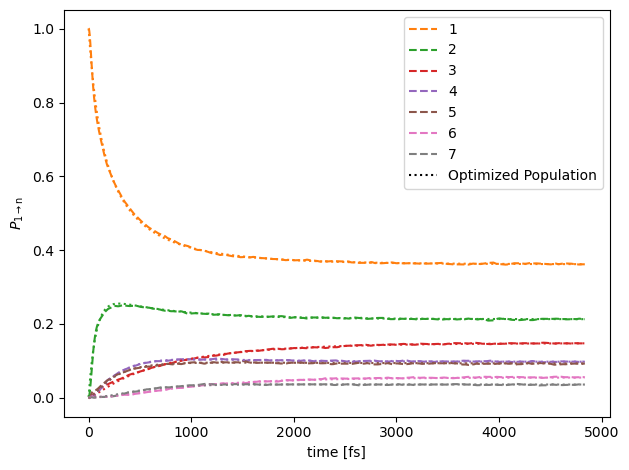

In [7]:
import matplotlib.pyplot as plt
import numpy as np

exc_data = np.loadtxt(exc_data_path)
full_opt_data = np.loadtxt("/u/dem/kebl6911/Part-II/MASH_optimization/optimization_using_all_data.dat")
column_names = ["Time"]

# DATA IMPORT - Using Pandas because it is easier for me
for i in range(1, 8):
    column_names.append(str(i))

for i, column_name in enumerate(column_names[1:], start=1):
    c = "C%i" % i
    plt.plot(exc_data[:, 0], exc_data[:, i], "--", label=column_name, color=c)


plt.ylabel(r"$P_{\mathrm{1\rightarrow n}}$")
plt.xlabel("time [fs]")

# Create the legend handles and labels manually
legend_handles = []
legend_labels = []

for line, label in zip(plt.gca().get_lines(), column_names[1:]):
    legend_handles.append(line)
    legend_labels.append(label)

# Add your custom legend entry
dotted_legend_entry = plt.Line2D([0], [0], linestyle=':', color='Black', label='Optimized Population') #[0], [0], 
legend_handles.append(dotted_legend_entry)
legend_labels.append('Optimized Population')
print(legend_handles)
for i, column_name in enumerate(column_names[1:], start=1):
    c = "C%i" % i
    plt.plot(full_opt_data[:, 0], full_opt_data[:, i], ":", color=c)

# Create the final legend
plt.legend(legend_handles, legend_labels)

plt.tight_layout()
plt.show()